In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df_aisles = pd.read_csv("./data/aisles/aisles.csv")
df_departments = pd.read_csv("./data/departments/departments.csv")
df_order_products = pd.read_csv("./data/order_products/order_products.csv")
df_orders = pd.read_csv("./data/orders/orders.csv")
df_products = pd.read_csv("./data/products/products.csv")

In [3]:
df1 = pd.merge(df_orders, df_order_products, on="order_id", how="inner")
df2 = pd.merge(df1, df_products, on="product_id")
df3 = pd.merge(df2, df_aisles, on="aisle_id")
df_all = pd.merge(df3, df_departments, on="department_id")
df_all

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,aisle,department
0,2539329,1,1,2,8,NaN,196,1,Soda,77,7,soft drinks,beverages
1,2398795,1,2,3,7,15.0,196,1,Soda,77,7,soft drinks,beverages
2,473747,1,3,3,12,21.0,196,1,Soda,77,7,soft drinks,beverages
3,2254736,1,4,4,7,29.0,196,1,Soda,77,7,soft drinks,beverages
4,431534,1,5,4,15,28.0,196,1,Soda,77,7,soft drinks,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,2939884,130327,3,1,13,0.0,27414,5,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk
33819102,3267360,150683,1,5,16,NaN,27414,13,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk
33819103,414077,159238,9,6,12,8.0,27414,1,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk
33819104,813243,171675,13,2,6,13.0,27414,34,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk


In [4]:
df_all.to_csv("all data", index=False)

In [5]:
df_new = df_all[['user_id', 'aisle']]
df_value_count = df_new.groupby(['user_id', 'aisle']).size().reset_index(name='value_count')
df_value_count

,user_id,aisle,value_count
0,1,candy chocolate,2
1,1,cereal,4
2,1,cream,3
3,1,fresh fruits,5
4,1,milk,1
...,...,...,...
5919835,206209,soft drinks,11
5919836,206209,soy lactosefree,10
5919837,206209,spices seasonings,1
5919838,206209,trash bags liners,1


In [6]:
pivot_df = df_value_count.pivot(index='user_id', columns='aisle', values='value_count')
 
pivot_df

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,3.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,42.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
5,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
206206,NaN,4.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
206207,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,2.0,1.0,NaN,NaN,11.0,NaN,15.0


In [7]:
df = pivot_df.fillna(0)
df

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,0.0,2.0,1.0,0.0,0.0,11.0,0.0,15.0


In [8]:
X = df.values
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  2.],
       [ 0.,  3.,  0., ...,  2.,  0., 42.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 11.,  0., 15.],
       [ 0.,  3.,  0., ...,  0.,  0., 33.],
       [ 0.,  1.,  0., ...,  0.,  0.,  3.]])

## Log Transformation

In [9]:
log_X = np.log(1+X)
log_X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.09861229],
       [0.        , 1.38629436, 0.        , ..., 1.09861229, 0.        ,
        3.76120012],
       [0.        , 0.        , 0.        , ..., 1.09861229, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 2.48490665, 0.        ,
        2.77258872],
       [0.        , 1.38629436, 0.        , ..., 0.        , 0.        ,
        3.52636052],
       [0.        , 0.69314718, 0.        , ..., 0.        , 0.        ,
        1.38629436]])

In [10]:
X_scaler = StandardScaler().fit_transform(log_X) 

print(X_scaler)

[[-0.19837813 -0.53959644 -0.1177614  ... -0.8020072  -0.15730356
  -0.09219609]
 [-0.19837813  1.74137946 -0.1177614  ...  0.21106759 -0.15730356
   2.06752922]
 [-0.19837813 -0.53959644 -0.1177614  ...  0.21106759 -0.15730356
  -0.9833219 ]
 ...
 [-0.19837813 -0.53959644 -0.1177614  ...  1.48942564 -0.15730356
   1.26562927]
 [-0.19837813  1.74137946 -0.1177614  ... -0.8020072  -0.15730356
   1.87704198]
 [-0.19837813  0.60089151 -0.1177614  ... -0.8020072  -0.15730356
   0.14115368]]


In [11]:
pca = PCA(n_components = 2)
pca.fit(X_scaler)
x_pca = pca.transform(X_scaler)

In [12]:
x_pca

array([[-3.22857633,  0.93323918],
       [ 1.73103311,  0.06164769],
       [-2.39965523, -0.68057776],
       ...,
       [ 3.86406486, -2.84448823],
       [11.76807172, -3.69273759],
       [ 1.76050489,  0.70766524]])

In [13]:
pca_df = pd.DataFrame(x_pca,columns=['principle component 1','principle component 2'])
pca_df.head()


,principle component 1,principle component 2
0,-3.228576,0.933239
1,1.731033,0.061648
2,-2.399655,-0.680578
3,-4.439761,1.202410
4,-3.016451,-0.753324


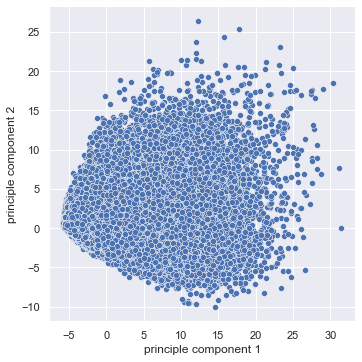

In [14]:
sns.relplot(x = "principle component 1", y = 'principle component 2',data=pca_df)

In [15]:
x = pca_df.copy()

In [16]:
kmeans = KMeans(n_clusters=3, random_state=9)
kmeans.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [17]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

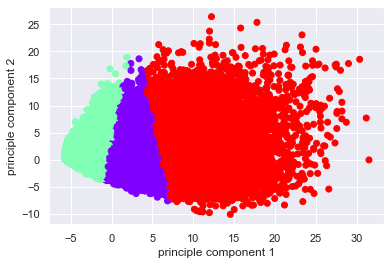

In [18]:
plt.scatter(clusters["principle component 1"], clusters["principle component 2"], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel("principle component 1")
plt.ylabel('principle component 2')
plt.show()

In [19]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x_pca)
x_scaled

array([[-0.72520853,  0.39687559],
       [ 0.38882772,  0.02621671],
       [-0.53901481, -0.28942709],
       ...,
       [ 0.86795309, -1.20966626],
       [ 2.64336512, -1.57039851],
       [ 0.39544773,  0.30094649]])

In [20]:
wcss = []

for i in range(1, 30):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[412417.99999999383,
 274196.88904969796,
 165765.94761592447,
 132969.719140686,
 105400.56653320264,
 91287.90398484413,
 79852.51624498834,
 70620.3659974106,
 62686.16924158395,
 57352.90435807003,
 52688.45562517655,
 48247.06928636495,
 44894.70541536368,
 41801.08452304322,
 39441.890169987906,
 37117.30432888807,
 35034.629216864254,
 33083.428655189695,
 31616.305001591045,
 30067.532752276882,
 28805.028733363335,
 27435.96636880051,
 26318.52234018222,
 25346.719907230206,
 24545.47150098446,
 23541.7887189656,
 22767.30416406854,
 22002.88464976562,
 21346.17244701874]

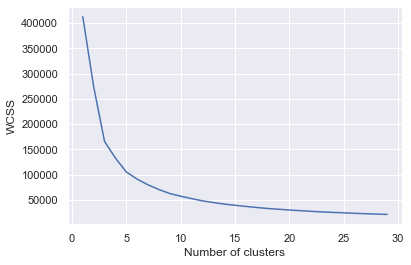

In [21]:
plt.plot(range(1,30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans_new = KMeans(n_clusters=5)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new.shape

(206209, 3)

In [23]:
cluster_new.head(10)

,principle component 1,principle component 2,cluster_pred
0,-3.228576,0.933239,1
1,1.731033,0.061648,3
2,-2.399655,-0.680578,1
3,-4.439761,1.202410,1
4,-3.016451,-0.753324,1
5,-4.683068,-0.687037,1
6,1.427436,-1.389439,3
7,-2.512492,-2.011903,3
8,-1.248461,-0.022392,1
9,0.494699,-3.091305,3


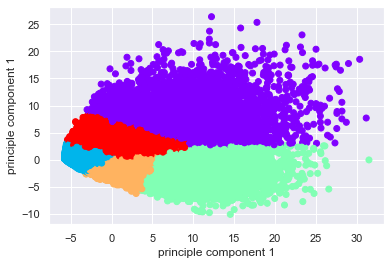

In [24]:
plt.scatter(cluster_new["principle component 1"], cluster_new["principle component 2"], c=cluster_new['cluster_pred'], cmap='rainbow')
plt.xlabel("principle component 1")
plt.ylabel("principle component 1")
plt.show()

In [25]:
cluster_new.index = range(1, 206210)
cluster_new

,principle component 1,principle component 2,cluster_pred
1,-3.228576,0.933239,1
2,1.731033,0.061648,3
3,-2.399655,-0.680578,1
4,-4.439761,1.202410,1
5,-3.016451,-0.753324,1
...,...,...,...
206205,-2.789234,-1.094936,1
206206,5.209735,2.085971,4
206207,3.864065,-2.844488,3
206208,11.768072,-3.692738,2


In [26]:
df_full = pd.concat([df, cluster_new], axis=1)
df_full

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-3.228576,0.933239,1
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,42.0,1.731033,0.061648,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.399655,-0.680578,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-4.439761,1.202410,1
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-3.016451,-0.753324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,-2.789234,-1.094936,1
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.209735,2.085971,4
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,11.0,0.0,15.0,3.864065,-2.844488,3
206208,0.0,3.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,33.0,11.768072,-3.692738,2


In [27]:
cluster_new.head(10)

,principle component 1,principle component 2,cluster_pred
1,-3.228576,0.933239,1
2,1.731033,0.061648,3
3,-2.399655,-0.680578,1
4,-4.439761,1.202410,1
5,-3.016451,-0.753324,1
6,-4.683068,-0.687037,1
7,1.427436,-1.389439,3
8,-2.512492,-2.011903,3
9,-1.248461,-0.022392,1
10,0.494699,-3.091305,3


In [28]:
df_log = cluster_new["cluster_pred"]
df_log

1         1
2         3
3         1
4         1
5         1
         ..
206205    1
206206    4
206207    3
206208    2
206209    4
Name: cluster_pred, Length: 206209, dtype: int32

In [29]:
df_order_products

,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5
...,...,...,...
33819101,3421063,14233,3
33819102,3421063,35548,4
33819103,3421070,35951,1
33819104,3421070,16953,2


In [30]:
df_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
...,...,...,...,...,...,...
3421078,2266710,206209,10,5,18,29.0
3421079,1854736,206209,11,4,10,30.0
3421080,626363,206209,12,1,12,18.0
3421081,2977660,206209,13,1,12,7.0


In [31]:
df_products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [32]:
df2

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,department_id
0,2539329,1,1,2,8,NaN,196,1,Soda,77,7
1,2398795,1,2,3,7,15.0,196,1,Soda,77,7
2,473747,1,3,3,12,21.0,196,1,Soda,77,7
3,2254736,1,4,4,7,29.0,196,1,Soda,77,7
4,431534,1,5,4,15,28.0,196,1,Soda,77,7
...,...,...,...,...,...,...,...,...,...,...,...
33819101,1320836,202557,17,2,15,1.0,43553,2,Orange Energy Shots,64,7
33819102,31526,202557,18,5,11,3.0,43553,2,Orange Energy Shots,64,7
33819103,758936,203436,1,2,7,NaN,42338,4,"Zucchini Chips, Pesto",50,19
33819104,2745165,203436,2,3,5,15.0,42338,16,"Zucchini Chips, Pesto",50,19


In [33]:
df_full.index.names = ["user_id"]
df_full

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-3.228576,0.933239,1
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,42.0,1.731033,0.061648,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.399655,-0.680578,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-4.439761,1.202410,1
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-3.016451,-0.753324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,-2.789234,-1.094936,1
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.209735,2.085971,4
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,11.0,0.0,15.0,3.864065,-2.844488,3


In [34]:
df_user_pred = df_full["cluster_pred"]
df_user_pred

user_id
1         1
2         3
3         1
4         1
5         1
         ..
206205    1
206206    4
206207    3
206208    2
206209    4
Name: cluster_pred, Length: 206209, dtype: int32

In [35]:
df_pred = pd.merge(df_all[["user_id", "product_name", "aisle", "department"]], df_user_pred, on="user_id")
df_pred

,user_id,product_name,aisle,department,cluster_pred
0,1,Soda,soft drinks,beverages,1
1,1,Soda,soft drinks,beverages,1
2,1,Soda,soft drinks,beverages,1
3,1,Soda,soft drinks,beverages,1
4,1,Soda,soft drinks,beverages,1
...,...,...,...,...,...
33819101,194803,Baby Dry Diapers Size 4,diapers wipes,babies,1
33819102,194803,Baby Dry Diapers Size 4,diapers wipes,babies,1
33819103,194803,Baby Dry Diapers Size 4,diapers wipes,babies,1
33819104,194803,Baby Dry Diapers Size 4,diapers wipes,babies,1


In [36]:
grouped = df_pred.groupby(["product_name", "cluster_pred"]).size().rename("size").sort_values(ascending=False).reset_index()
grouped

,product_name,cluster_pred,size
0,Banana,2,165956
1,Banana,3,159839
2,Bag of Organic Bananas,2,152907
3,Organic Strawberries,2,129545
4,Bag of Organic Bananas,3,122662
...,...,...,...
216189,Chinese Long Beans,0,1
216190,Rainbow Salad,2,1
216191,Rainbow Sherbet Ice Cream,2,1
216192,Chinese Five Spice Blend,2,1


In [37]:
grouped.head(10).product_name.values

array(['Banana', 'Banana', 'Bag of Organic Bananas',
       'Organic Strawberries', 'Bag of Organic Bananas',
       'Organic Baby Spinach', 'Organic Hass Avocado',
       'Organic Baby Spinach', 'Organic Strawberries',
       'Organic Hass Avocado'], dtype=object)

In [38]:
log_cluster0 = df_pred.loc[df_pred["cluster_pred"] == 0]
log_cluster0

,user_id,product_name,aisle,department,cluster_pred
142,19,Soda,soft drinks,beverages,0
143,19,Soda,soft drinks,beverages,0
144,19,Soda,soft drinks,beverages,0
145,19,Coke Zero Diet Soda,soft drinks,beverages,0
146,19,Coke Zero Diet Soda,soft drinks,beverages,0
...,...,...,...,...,...
33774238,27123,Replenish Contact Lens Solution,eye ear care,personal care,0
33774239,27123,Opti-Free Replenish Multi-Purpose Disinfecting...,eye ear care,personal care,0
33774240,27123,Pearl Super Absorbency Unscented Tampons,feminine care,personal care,0
33774241,27123,Sriracha Chili Sauce,asian foods,international,0


In [39]:
log_cluster1 = df_pred.loc[df_pred["cluster_pred"] == 1]
log_cluster1

,user_id,product_name,aisle,department,cluster_pred
0,1,Soda,soft drinks,beverages,1
1,1,Soda,soft drinks,beverages,1
2,1,Soda,soft drinks,beverages,1
3,1,Soda,soft drinks,beverages,1
4,1,Soda,soft drinks,beverages,1
...,...,...,...,...,...
33819101,194803,Baby Dry Diapers Size 4,diapers wipes,babies,1
33819102,194803,Baby Dry Diapers Size 4,diapers wipes,babies,1
33819103,194803,Baby Dry Diapers Size 4,diapers wipes,babies,1
33819104,194803,Baby Dry Diapers Size 4,diapers wipes,babies,1


In [40]:
log_cluster2 = df_pred.loc[df_pred["cluster_pred"] == 2]
log_cluster2

,user_id,product_name,aisle,department,cluster_pred
9513,1609,Soda,soft drinks,beverages,2
9514,1609,Coke Classic,soft drinks,beverages,2
9515,1609,Fanta Orange Soda,soft drinks,beverages,2
9516,1609,Fanta Orange Soda,soft drinks,beverages,2
9517,1609,Fanta Orange Soda,soft drinks,beverages,2
...,...,...,...,...,...
33432359,158656,Organic Baby Foods Whole Grain Multi-Grain Cereal,baby food formula,babies,2
33432360,158656,Organic Turkish Apricots,bulk grains rice dried goods,bulk,2
33432361,158656,Organic Turkish Apricots,bulk grains rice dried goods,bulk,2
33432362,158656,Organic Turkish Apricots,bulk grains rice dried goods,bulk,2


In [41]:
log_cluster3 = df_pred.loc[df_pred["cluster_pred"] == 3]
log_cluster3

,user_id,product_name,aisle,department,cluster_pred
856,43,Soda,soft drinks,beverages,3
857,43,Soda,soft drinks,beverages,3
858,43,Citrus Soda,soft drinks,beverages,3
859,43,Tomato Juice,juice nectars,beverages,3
860,43,Unsweetened Coconutmilk,soy lactosefree,dairy eggs,3
...,...,...,...,...,...
33798929,16639,Organic Pinto Beans,canned meals beans,canned goods,3
33798930,16639,Organic Pinto Beans,canned meals beans,canned goods,3
33798931,16639,Organic Short Grain Brown Rice,grains rice dried goods,dry goods pasta,3
33798932,16639,Organic Poblano Pepper,missing,missing,3


In [42]:
log_cluster4 = df_pred.loc[df_pred["cluster_pred"] == 4]
log_cluster4

,user_id,product_name,aisle,department,cluster_pred
346,21,Soda,soft drinks,beverages,4
347,21,Canned Aranciata Orange,soft drinks,beverages,4
348,21,Canned Aranciata Orange,soft drinks,beverages,4
349,21,Canned Aranciata Orange,soft drinks,beverages,4
350,21,Sparking Apple Cider,soft drinks,beverages,4
...,...,...,...,...,...
33817969,21411,Brut Sparkling Wine,specialty wines champagnes,alcohol,4
33817970,21411,Brut Sparkling Wine,specialty wines champagnes,alcohol,4
33817971,21411,Chardonnay,white wines,alcohol,4
33817972,21411,Chardonnay,white wines,alcohol,4


In [43]:
log_grouped0 = log_cluster0.groupby(["product_name", "cluster_pred"]).size().rename("size").sort_values(ascending=False).reset_index()
log_grouped0

,product_name,cluster_pred,size
0,Banana,0,38340
1,Bag of Organic Bananas,0,16890
2,Strawberries,0,13201
3,2% Reduced Fat Milk,0,9781
4,100% Whole Wheat Bread,0,8112
...,...,...,...
42891,Marionberries,0,1
42892,"Marmalade, Pink Grapefruit",0,1
42893,Thin Sliced Powerseed Bread,0,1
42894,Marvel Ultimate Spider-Man Fruit Flavored Snacks,0,1


In [44]:
for i in log_grouped0.head(10).product_name.values.tolist():
    print(i, log_cluster0.loc[log_cluster0["product_name"] == i].aisle.unique())

Banana ['fresh fruits']
Bag of Organic Bananas ['fresh fruits']
Strawberries ['fresh fruits']
2% Reduced Fat Milk ['milk']
100% Whole Wheat Bread ['bread']
Organic Strawberries ['fresh fruits']
Large Lemon ['fresh fruits']
Organic Raspberries ['packaged vegetables fruits']
Blueberries ['frozen produce']
Organic Fuji Apple ['fresh fruits']


In [45]:
product_aisle0 = []
for i in log_grouped0.head(10).product_name.values.tolist():
    aisle = log_cluster0.loc[log_cluster0["product_name"] == i].aisle.unique().tolist()
    product_aisle0.append(aisle)
log_grouped0["product_aisle"] = pd.Series(np.array(product_aisle0).flatten())
log_grouped0.head(10)

,product_name,cluster_pred,size,product_aisle
0,Banana,0,38340,fresh fruits
1,Bag of Organic Bananas,0,16890,fresh fruits
2,Strawberries,0,13201,fresh fruits
3,2% Reduced Fat Milk,0,9781,milk
4,100% Whole Wheat Bread,0,8112,bread
5,Organic Strawberries,0,7994,fresh fruits
6,Large Lemon,0,7960,fresh fruits
7,Organic Raspberries,0,7197,packaged vegetables fruits
8,Blueberries,0,6842,frozen produce
9,Organic Fuji Apple,0,6674,fresh fruits


In [46]:
log_grouped1 = log_cluster1.groupby(["product_name", "cluster_pred"]).size().rename("size").sort_values(ascending=False).reset_index()
product_aisle1 = []
for i in log_grouped1.head(10).product_name.values.tolist():
    aisle = log_cluster1.loc[log_cluster1["product_name"] == i].aisle.unique().tolist()
    product_aisle1.append(aisle)
log_grouped1["product_aisle"] = pd.Series(np.array(product_aisle1).flatten())
log_grouped1.head(10)

,product_name,cluster_pred,size,product_aisle
0,Bag of Organic Bananas,1,73196,fresh fruits
1,Banana,1,69982,fresh fruits
2,Organic Baby Spinach,1,38080,packaged vegetables fruits
3,Organic Strawberries,1,36982,fresh fruits
4,Strawberries,1,34878,fresh fruits
5,Raspberries,1,24183,packaged produce
6,Organic Avocado,1,23284,fresh fruits
7,Hass Avocados,1,22756,packaged produce
8,Organic Blueberries,1,22275,packaged vegetables fruits
9,Organic Hass Avocado,1,21698,fresh fruits


In [47]:
log_grouped2 = log_cluster2.groupby(["product_name", "cluster_pred"]).size().rename("size").sort_values(ascending=False).reset_index()
product_aisle2 = []
for i in log_grouped2.head(10).product_name.values.tolist():
    aisle = log_cluster2.loc[log_cluster2["product_name"] == i].aisle.unique().tolist()
    product_aisle2.append(aisle)
log_grouped2["product_aisle"] = pd.Series(np.array(product_aisle2).flatten())
log_grouped2.head(10)

,product_name,cluster_pred,size,product_aisle
0,Banana,2,165956,fresh fruits
1,Bag of Organic Bananas,2,152907,fresh fruits
2,Organic Strawberries,2,129545,fresh fruits
3,Organic Baby Spinach,2,105592,packaged vegetables fruits
4,Organic Hass Avocado,2,104462,fresh fruits
5,Organic Avocado,2,72650,fresh fruits
6,Organic Whole Milk,2,68476,milk
7,Organic Raspberries,2,65990,packaged vegetables fruits
8,Limes,2,63281,fresh fruits
9,Large Lemon,2,59902,fresh fruits


In [48]:
log_grouped3 = log_cluster3.groupby(["product_name", "cluster_pred"]).size().rename("size").sort_values(ascending=False).reset_index()
product_aisle3 = []
for i in log_grouped3.head(10).product_name.values.tolist():
    aisle = log_cluster3.loc[log_cluster3["product_name"] == i].aisle.unique().tolist()
    product_aisle3.append(aisle)
log_grouped3["product_aisle"] = pd.Series(np.array(product_aisle3).flatten())
log_grouped3.head(10)

,product_name,cluster_pred,size,product_aisle
0,Banana,3,159839,fresh fruits
1,Bag of Organic Bananas,3,122662,fresh fruits
2,Organic Baby Spinach,3,97755,packaged vegetables fruits
3,Organic Strawberries,3,89717,fresh fruits
4,Organic Hass Avocado,3,78579,fresh fruits
5,Organic Avocado,3,73984,fresh fruits
6,Large Lemon,3,60163,fresh fruits
7,Limes,3,53093,fresh fruits
8,Organic Whole Milk,3,48793,milk
9,Organic Raspberries,3,46538,packaged vegetables fruits


In [49]:
log_grouped4 = log_cluster4.groupby(["product_name", "cluster_pred"]).size().rename("size").sort_values(ascending=False).reset_index()
product_aisle4 = []
for i in log_grouped4.head(10).product_name.values.tolist():
    aisle = log_cluster4.loc[log_cluster4["product_name"] == i].aisle.unique().tolist()
    product_aisle4.append(aisle)
log_grouped4["product_aisle"] = pd.Series(np.array(product_aisle4).flatten())
log_grouped4.head(10)

,product_name,cluster_pred,size,product_aisle
0,Banana,4,57174,fresh fruits
1,Bag of Organic Bananas,4,29275,fresh fruits
2,Strawberries,4,18184,fresh fruits
3,Soda,4,14271,soft drinks
4,Large Lemon,4,12634,fresh fruits
5,2% Reduced Fat Milk,4,11736,milk
6,Organic Strawberries,4,11339,fresh fruits
7,Organic Fuji Apple,4,11310,fresh fruits
8,Organic Half & Half,4,10937,cream
9,100% Whole Wheat Bread,4,10292,bread


Text(0.5, 0, 'First group top 10 product name')

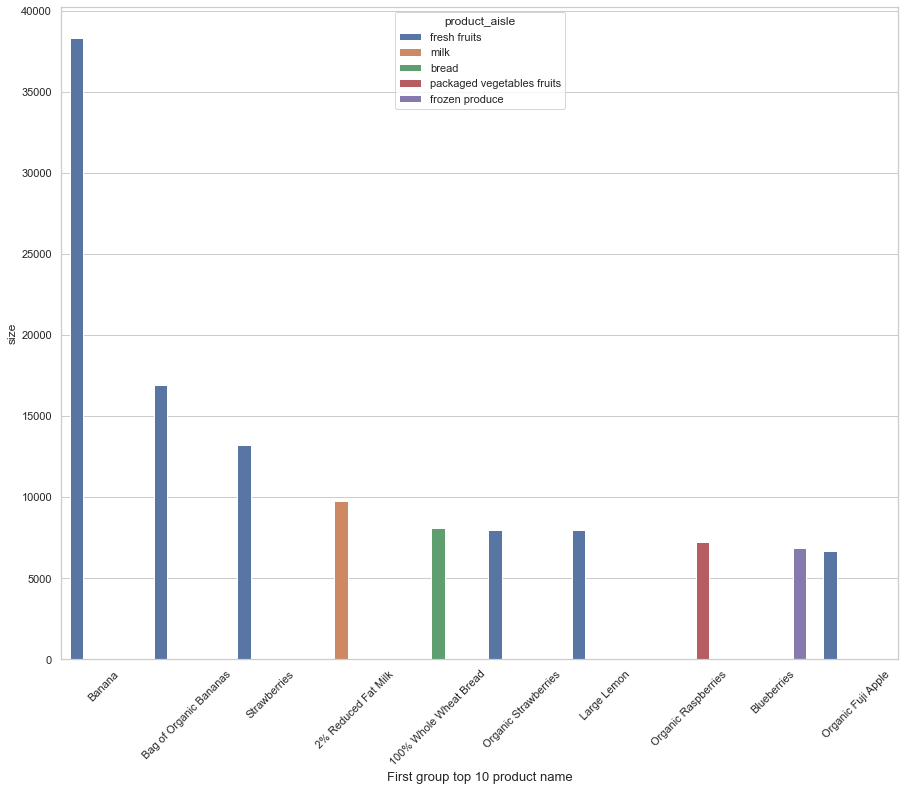

In [50]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=45)

sns.barplot(x="product_name", y="size", estimator=sum, hue="product_aisle", data=log_grouped0.head(10))
plt.xlabel("First group top 10 product name", fontsize=13)


Text(0.5, 0, 'Second group top 10 product name')

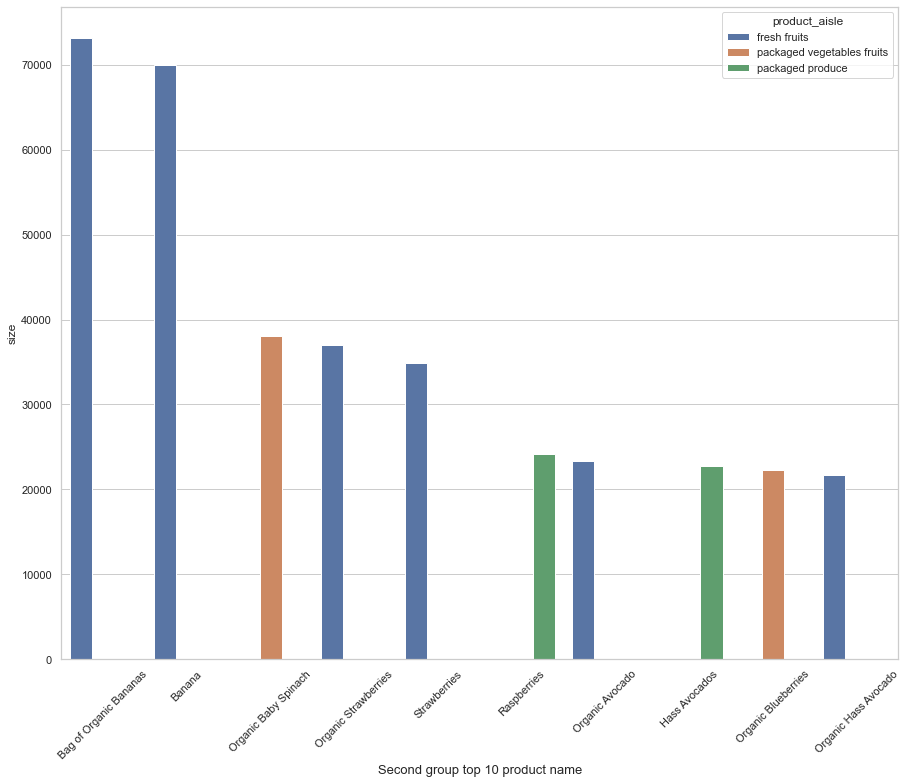

In [51]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=45)

sns.barplot(x="product_name", y="size", estimator=sum, hue="product_aisle", data=log_grouped1.head(10))
plt.xlabel("Second group top 10 product name", fontsize=13)


Text(0.5, 0, 'Thrid group top 10 product name')

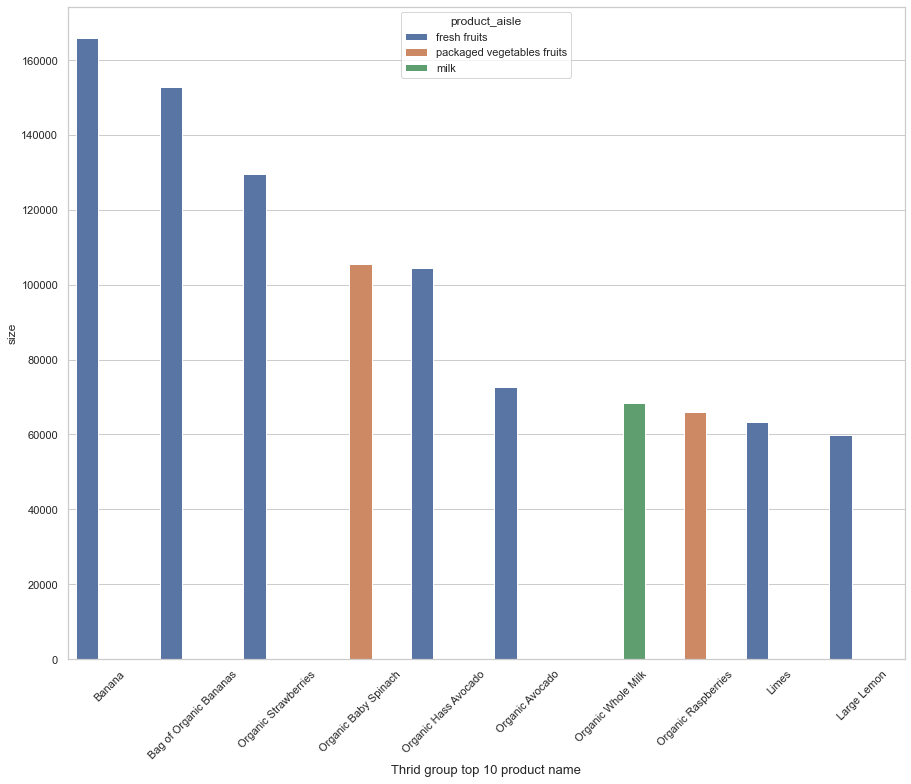

In [52]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=45)

sns.barplot(x="product_name", y="size", estimator=sum, hue="product_aisle", data=log_grouped2.head(10))
plt.xlabel("Thrid group top 10 product name", fontsize=13)


Text(0.5, 0, 'Forth group top 10 product name')

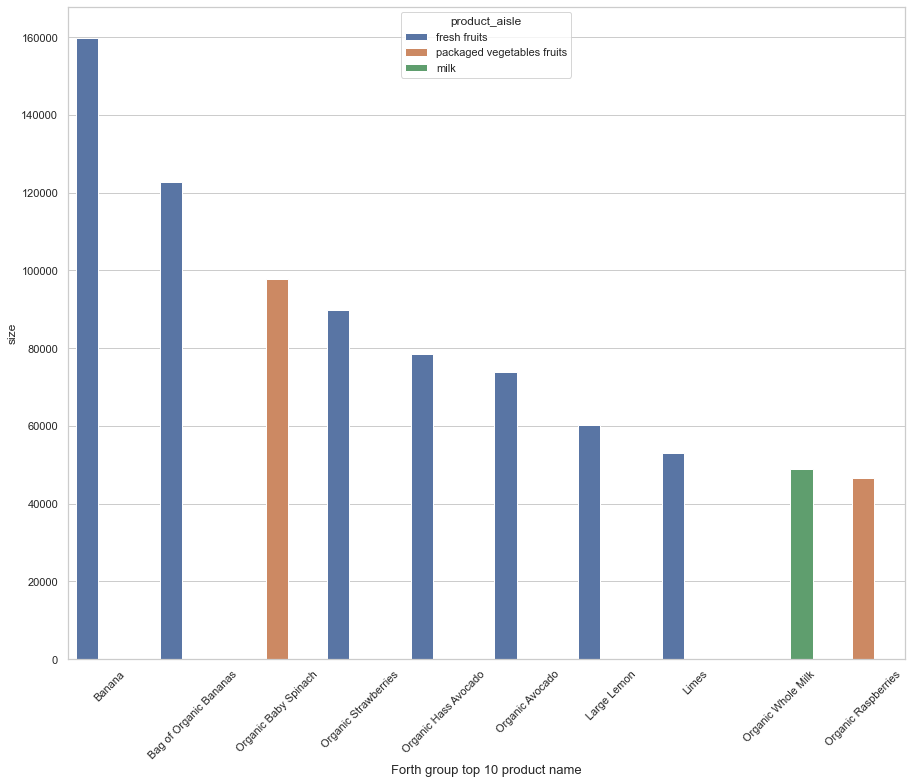

In [53]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=45)

sns.barplot(x="product_name", y="size", estimator=sum, hue="product_aisle", data=log_grouped3.head(10))
plt.xlabel("Forth group top 10 product name", fontsize=13)


Text(0.5, 0, 'Second group top 10 product name')

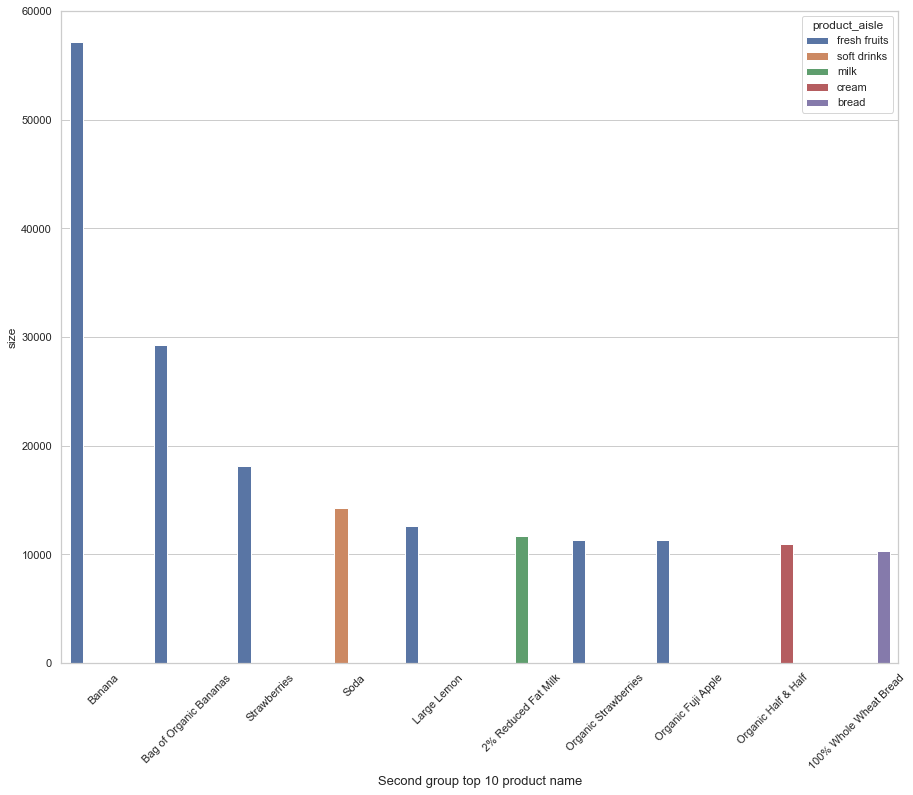

In [54]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=45)

sns.barplot(x="product_name", y="size", estimator=sum, hue="product_aisle", data=log_grouped4.head(10))
plt.xlabel("Second group top 10 product name", fontsize=13)


## Analysis (The final step)

Through the given figure following things can be interpreted:

1. Most of users order fresh fruits in this market.

2. Banana and bage of organic bananas are the most favorite food in all cluster which are always the top 2 products that user usually order.

3. The user in the first group prefer to order some packaged vegetable fruits like organic babay spinach and less likely to order milk.

4. The user in the second group also prefer to order some packaged vegetable fruits like organic babay spinach and less likely to order packaged produce.

5. The user in the third group have the same preference on bread, packaged vegatable fruits and frozen produce.

6. The user in the forth group have the same preference on soft drink, milk, cream and bread.

7. The user in the last group also prefer to order some packaged vegetable fruits like organic babay spinach and more likely to order milk than the first group.

The ultimate goal of any market would be to increase the sales volumns. According to the analysis, market can recommand target products to users or bundle sales of the favorite products and less favorite products.

## Group by aisle

In [55]:
log_cluster0

,user_id,product_name,aisle,department,cluster_pred
142,19,Soda,soft drinks,beverages,0
143,19,Soda,soft drinks,beverages,0
144,19,Soda,soft drinks,beverages,0
145,19,Coke Zero Diet Soda,soft drinks,beverages,0
146,19,Coke Zero Diet Soda,soft drinks,beverages,0
...,...,...,...,...,...
33774238,27123,Replenish Contact Lens Solution,eye ear care,personal care,0
33774239,27123,Opti-Free Replenish Multi-Purpose Disinfecting...,eye ear care,personal care,0
33774240,27123,Pearl Super Absorbency Unscented Tampons,feminine care,personal care,0
33774241,27123,Sriracha Chili Sauce,asian foods,international,0


In [57]:
log_aislegrouped0 = log_cluster0.groupby(["aisle", "cluster_pred"]).size().rename("size").sort_values(ascending=False).reset_index()
log_aislegrouped0

,aisle,cluster_pred,size
0,fresh fruits,0,198298
1,fresh vegetables,0,149492
2,yogurt,0,117147
3,packaged vegetables fruits,0,109212
4,packaged cheese,0,94232
...,...,...,...
129,skin care,0,1379
130,seafood counter,0,717
131,indian foods,0,614
132,bulk dried fruits vegetables,0,241


Text(0.5, 0, 'First group top 10 aisle')

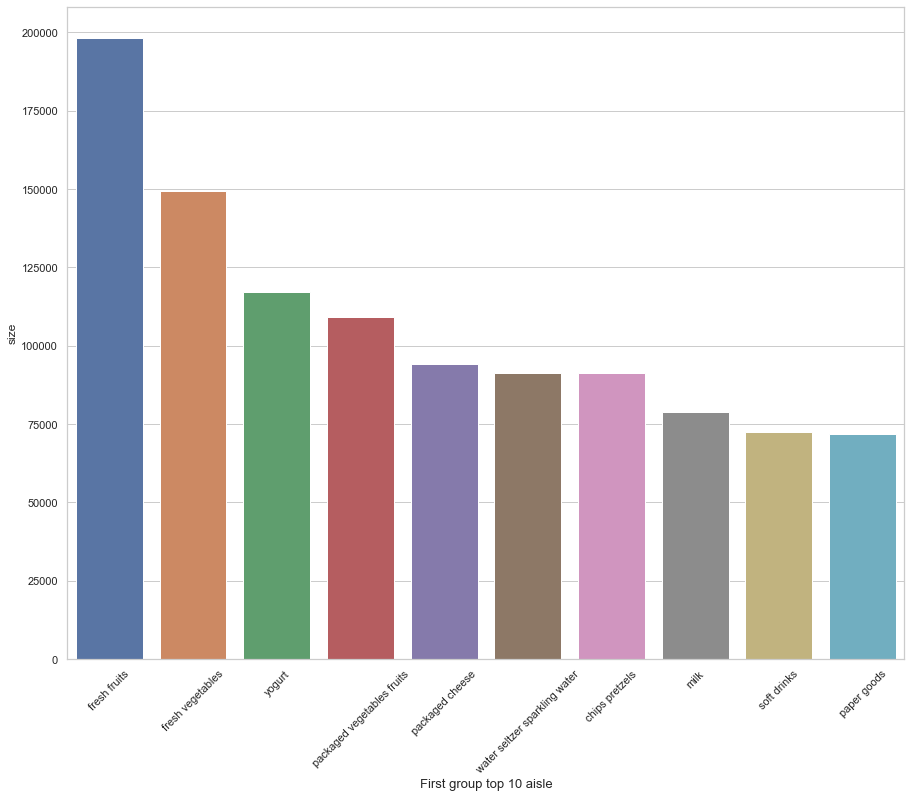

In [69]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=45)

sns.barplot(x="aisle", y="size", estimator=sum, data=log_aislegrouped0.head(10))
plt.xlabel("First group top 10 aisle", fontsize=13)


In [70]:
log_aislegrouped1 = log_cluster1.groupby(["aisle", "cluster_pred"]).size().rename("size").sort_values(ascending=False).reset_index()
log_aislegrouped1

,aisle,cluster_pred,size
0,fresh fruits,1,589951
1,fresh vegetables,1,417596
2,packaged vegetables fruits,1,254850
3,yogurt,1,203485
4,water seltzer sparkling water,1,185412
...,...,...,...
129,shave needs,1,882
130,frozen juice,1,825
131,baby accessories,1,686
132,baby bath body care,1,652


Text(0.5, 0, 'Second group top 10 aisle')

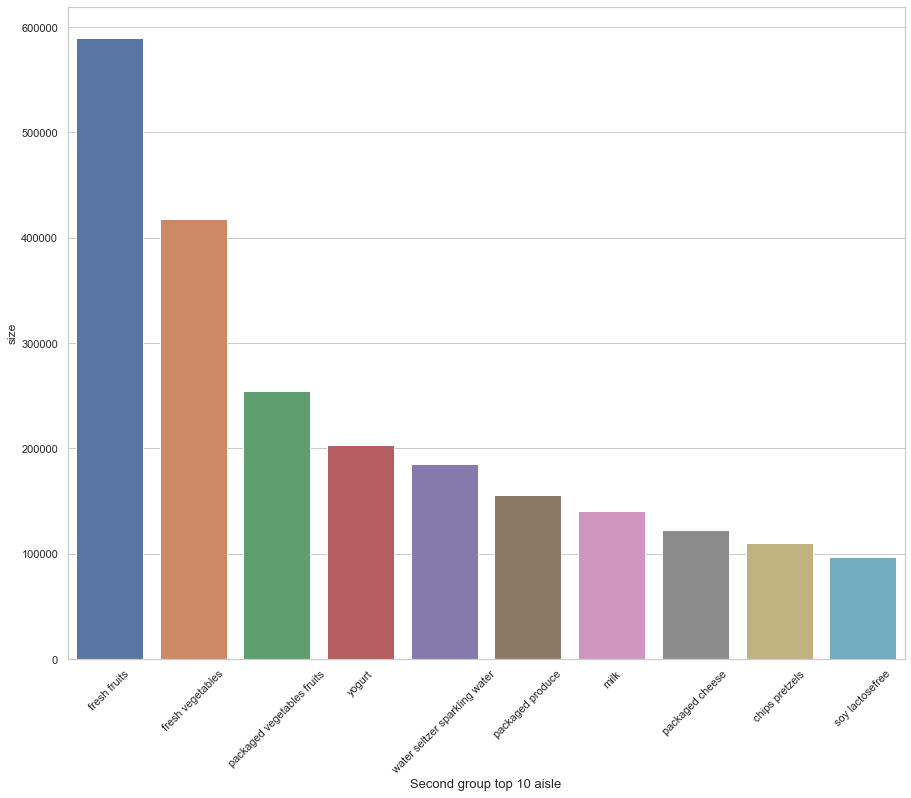

In [71]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=45)

sns.barplot(x="aisle", y="size", estimator=sum, data=log_aislegrouped1.head(10))
plt.xlabel("Second group top 10 aisle", fontsize=13)


In [72]:
log_aislegrouped2 = log_cluster2.groupby(["aisle", "cluster_pred"]).size().rename("size").sort_values(ascending=False).reset_index()
log_aislegrouped2

,aisle,cluster_pred,size
0,fresh vegetables,2,1461450
1,fresh fruits,2,1442646
2,packaged vegetables fruits,2,703089
3,yogurt,2,549208
4,packaged cheese,2,393677
...,...,...,...
129,shave needs,2,565
130,spirits,2,496
131,eye ear care,2,319
132,specialty wines champagnes,2,303


Text(0.5, 0, 'Third group top 10 aisle')

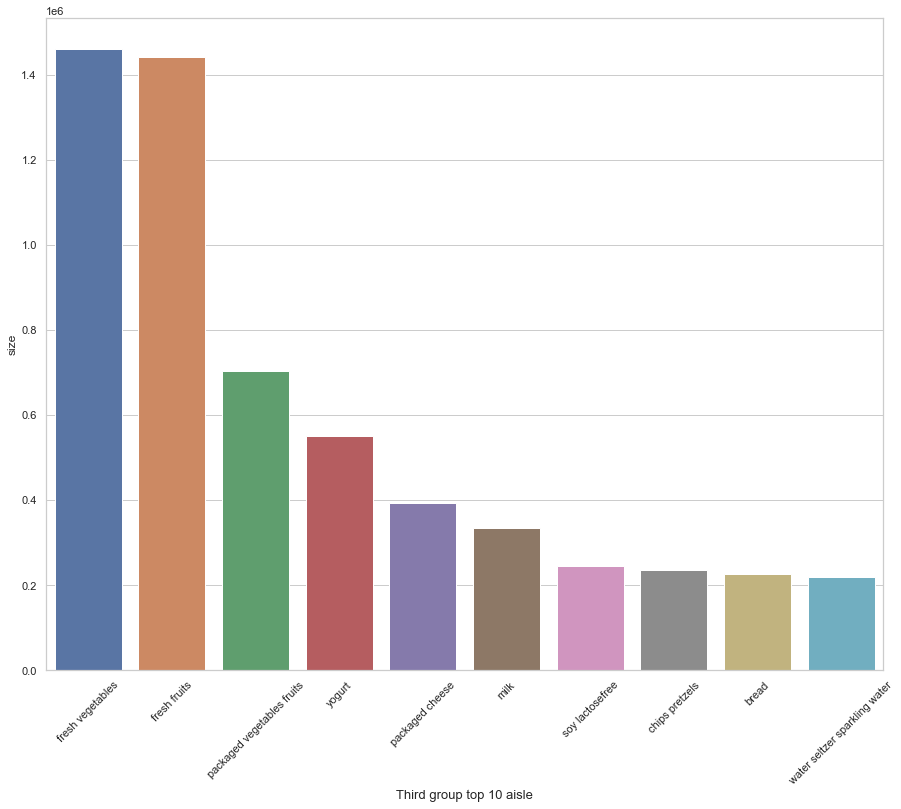

In [73]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=45)

sns.barplot(x="aisle", y="size", estimator=sum, data=log_aislegrouped2.head(10))
plt.xlabel("Third group top 10 aisle", fontsize=13)


In [74]:
log_aislegrouped3 = log_cluster3.groupby(["aisle", "cluster_pred"]).size().rename("size").sort_values(ascending=False).reset_index()
log_aislegrouped3

,aisle,cluster_pred,size
0,fresh vegetables,3,1331891
1,fresh fruits,3,1252496
2,packaged vegetables fruits,3,631891
3,yogurt,3,466708
4,packaged cheese,3,291678
...,...,...,...
129,spirits,3,586
130,shave needs,3,423
131,eye ear care,3,331
132,specialty wines champagnes,3,269


Text(0.5, 0, 'Forth group top 10 aisle')

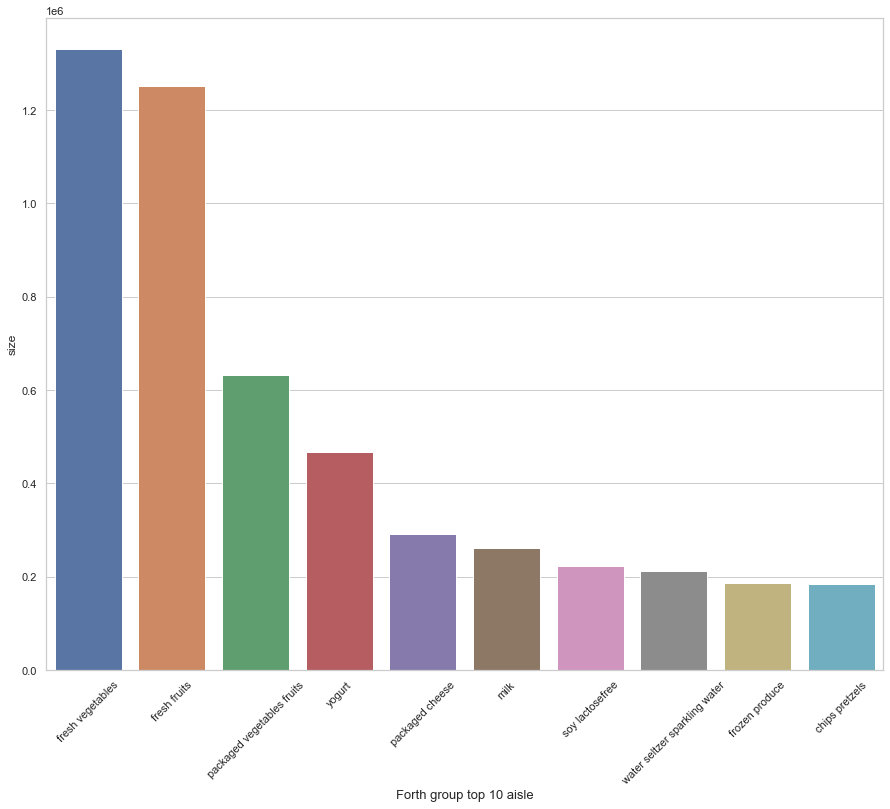

In [75]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=45)

sns.barplot(x="aisle", y="size", estimator=sum, data=log_aislegrouped3.head(10))
plt.xlabel("Forth group top 10 aisle", fontsize=13)


In [76]:
log_aislegrouped4 = log_cluster4.groupby(["aisle", "cluster_pred"]).size().rename("size").sort_values(ascending=False).reset_index()
log_aislegrouped4

,aisle,cluster_pred,size
0,fresh fruits,4,309270
1,fresh vegetables,4,208201
2,yogurt,4,171035
3,water seltzer sparkling water,4,169099
4,packaged vegetables fruits,4,144764
...,...,...,...
129,baby accessories,4,1415
130,frozen juice,4,1341
131,indian foods,4,1000
132,seafood counter,4,958


Text(0.5, 0, 'Fifth group top 10 aisle')

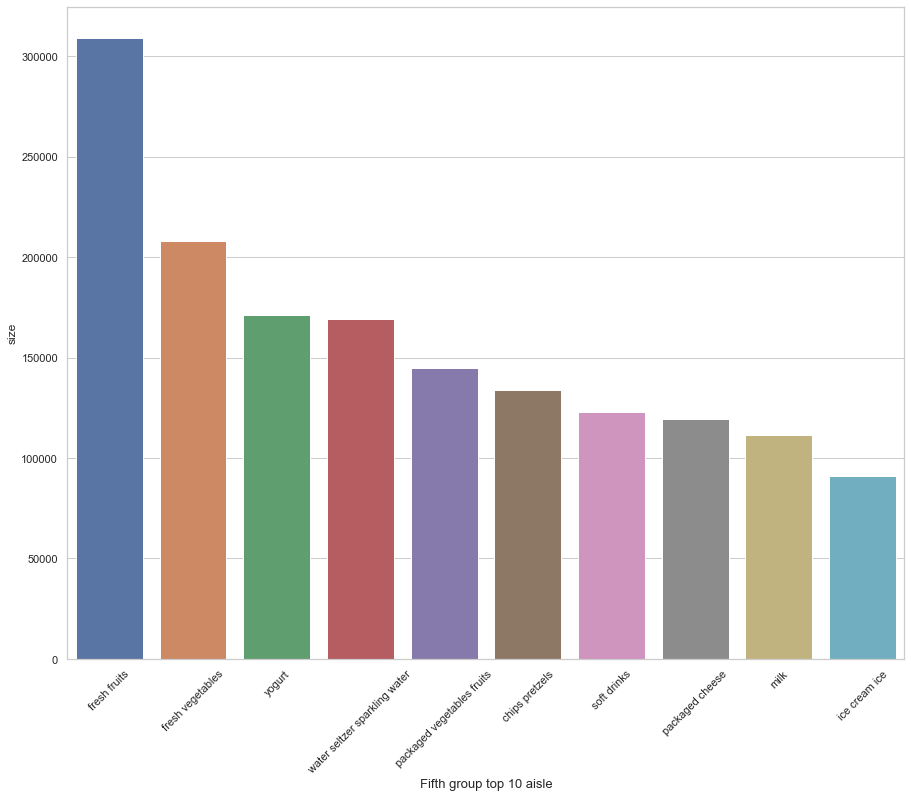

In [77]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=45)

sns.barplot(x="aisle", y="size", estimator=sum, data=log_aislegrouped4.head(10))
plt.xlabel("Fifth group top 10 aisle", fontsize=13)


# Analysis
1. As we can see in the plot fresh fruit and vagetables are the top 2 favorite aisles that users prefer to order.
2. The users in the first and last group ordered more yogurt than packaged vegetables fruit. 

## Binary Transformation

In [125]:
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  2.],
       [ 0.,  3.,  0., ...,  2.,  0., 42.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 11.,  0., 15.],
       [ 0.,  3.,  0., ...,  0.,  0., 33.],
       [ 0.,  1.,  0., ...,  0.,  0.,  3.]])

In [126]:
binary_X = np.int64(X >0)
binary_X

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1]])

In [128]:
binaryX_scaler = StandardScaler().fit_transform(binary_X) 

print(binaryX_scaler)

[[-0.22023299 -0.62324566 -0.13254177 ... -0.99619074 -0.18060937
   0.78838308]
 [-0.22023299  1.60450376 -0.13254177 ...  1.00382383 -0.18060937
   0.78838308]
 [-0.22023299 -0.62324566 -0.13254177 ...  1.00382383 -0.18060937
  -1.26841891]
 ...
 [-0.22023299 -0.62324566 -0.13254177 ...  1.00382383 -0.18060937
   0.78838308]
 [-0.22023299  1.60450376 -0.13254177 ... -0.99619074 -0.18060937
   0.78838308]
 [-0.22023299  1.60450376 -0.13254177 ... -0.99619074 -0.18060937
   0.78838308]]


In [129]:
pca = PCA(n_components = 2)
pca.fit(binaryX_scaler)
binaryx_pca = pca.transform(binaryX_scaler)

In [131]:
binarypca_df = pd.DataFrame(binaryx_pca,columns=['principle component 1','principle component 2'])
binarypca_df.head(10)

,principle component 1,principle component 2
0,-3.982559,0.690799
1,1.587181,0.572116
2,-2.956877,-0.325296
3,-3.975223,2.699752
4,-2.480933,-1.079852
5,-4.705186,-1.139112
6,1.150230,-1.310766
7,-1.942621,-2.734401
8,-0.588767,-0.059608
9,0.488357,-3.080992


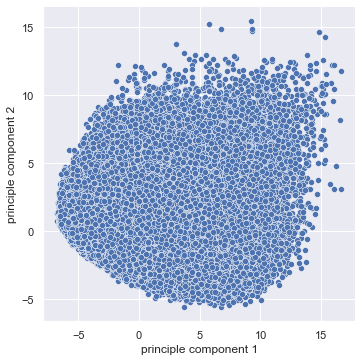

In [132]:
sns.relplot(x = "principle component 1", y = 'principle component 2',data=binarypca_df)

In [135]:
x = binarypca_df.copy()
kmeans = KMeans(n_clusters=3, random_state=9)
kmeans.fit(binarypca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [134]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

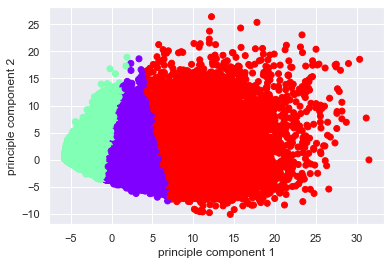

In [136]:
plt.scatter(clusters["principle component 1"], clusters["principle component 2"], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel("principle component 1")
plt.ylabel('principle component 2')
plt.show()

In [137]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(binaryx_pca)
x_scaled

array([[-1.04226344,  0.31479673],
       [ 0.41537622,  0.26071272],
       [-0.77383533, -0.14823738],
       ...,
       [ 1.15090074, -1.36960918],
       [ 2.17637299, -1.20505837],
       [ 0.88228546, -0.01188476]])

In [138]:
wcss = []

for i in range(1, 30):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[412418.0000000016,
 272375.5318931593,
 162458.63328306924,
 127279.85358059229,
 105010.78157484518,
 87923.20971148714,
 76556.85387093468,
 66764.85089613938,
 60482.921891639,
 55148.38182379925,
 50306.25936398821,
 45924.90478326754,
 42342.75572650664,
 39805.32633107754,
 37281.05101545591,
 35108.13564215169,
 33172.48873673936,
 31331.521998199863,
 29838.525802340468,
 28329.685226841393,
 27143.906885878656,
 25924.45046180487,
 24946.885369786105,
 24014.959702454365,
 23017.85233223692,
 22152.64268391606,
 21295.05376033952,
 20562.994133572676,
 19957.212887820526]

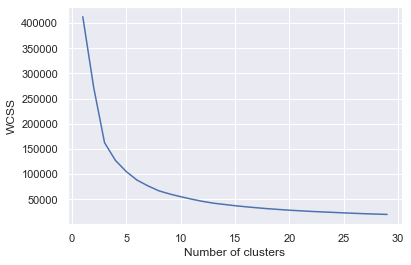

In [139]:
plt.plot(range(1,30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [144]:
kmeans_new = KMeans(5)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new.shape

(206209, 3)

In [145]:
cluster_new.head(10)

,principle component 1,principle component 2,cluster_pred
0,-3.982559,0.690799,4
1,1.587181,0.572116,1
2,-2.956877,-0.325296,4
3,-3.975223,2.699752,1
4,-2.480933,-1.079852,0
5,-4.705186,-1.139112,4
6,1.150230,-1.310766,0
7,-1.942621,-2.734401,0
8,-0.588767,-0.059608,0
9,0.488357,-3.080992,0


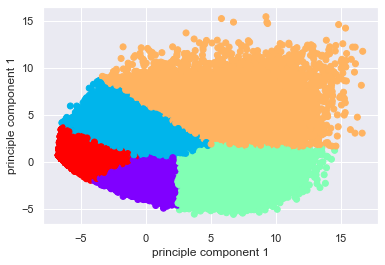

In [146]:
plt.scatter(cluster_new["principle component 1"], cluster_new["principle component 2"], c=cluster_new['cluster_pred'], cmap='rainbow')
plt.xlabel("principle component 1")
plt.ylabel("principle component 1")
plt.show()

In [147]:
cluster_new.index = range(1, 206210)
cluster_new

,principle component 1,principle component 2,cluster_pred
1,-3.982559,0.690799,4
2,1.587181,0.572116,1
3,-2.956877,-0.325296,4
4,-3.975223,2.699752,1
5,-2.480933,-1.079852,0
...,...,...,...
206205,-2.048600,-1.821387,0
206206,5.004053,1.888450,3
206207,4.397670,-3.005511,2
206208,8.316069,-2.644416,2


In [148]:
bydf_full = pd.concat([df, cluster_new], axis=1)
bydf_full

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-3.982559,0.690799,4
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,42.0,1.587181,0.572116,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.956877,-0.325296,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-3.975223,2.699752,1
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-2.480933,-1.079852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,-2.048600,-1.821387,0
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.004053,1.888450,3
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,11.0,0.0,15.0,4.397670,-3.005511,2
206208,0.0,3.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,33.0,8.316069,-2.644416,2


In [154]:
cluster0 = bydf_full.loc[bydf_full["cluster_pred"] == 0]
cluster0

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-2.480933,-1.079852,0
7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.150230,-1.310766,0
8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.942621,-2.734401,0
9,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,28.0,-0.588767,-0.059608,0
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.488357,-3.080992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206198,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.709596,-0.089426,0
206202,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,27.0,0.0,4.0,-0.184100,0.145968,0
206203,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,1.976324,-2.596642,0
206204,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.114378,-0.166365,0


In [155]:
cluster1 = bydf_full.loc[bydf_full["cluster_pred"] == 1]
cluster1

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,42.0,1.587181,0.572116,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-3.975223,2.699752,1
17,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36.0,32.0,6.0,0.994668,2.609208,1
21,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,13.0,4.0,14.0,1.071121,2.777173,1
23,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,12.0,-0.896526,2.623632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206149,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,2.0,0.0,18.0,-0.920612,0.750218,1
206153,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.371781,3.141648,1
206168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,0.0,5.0,0.249712,1.491419,1
206182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.460928,2.046409,1


In [156]:
cluster2 = bydf_full.loc[bydf_full["cluster_pred"] == 2]
cluster2

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
28,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,8.0,4.051729,-1.904044,2
38,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,21.0,0.0,1.0,3.358340,-1.869207,2
43,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,4.042207,-0.619439,2
54,1.0,8.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,44.0,0.0,7.0,9.278056,-1.389338,2
63,0.0,1.0,0.0,0.0,0.0,0.0,11.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,23.0,6.818484,-2.919339,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,0.0,49.0,5.723513,-0.295145,2
206200,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,2.0,2.504082,-2.406186,2
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,11.0,0.0,15.0,4.397670,-3.005511,2
206208,0.0,3.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,33.0,8.316069,-2.644416,2


In [157]:
cluster3 = bydf_full.loc[bydf_full["cluster_pred"] == 3]
cluster3

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
14,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6.161788,2.068198,3
19,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,0.0,1.0,3.0,0.0,0.0,5.0,7.251999,4.251597,3
29,1.0,0.0,0.0,0.0,0.0,9.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,1.0,2.888277,4.759789,3
61,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,2.0,0.0,7.0,3.996961,3.530407,3
117,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,4.0,1.319097,9.485502,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206165,6.0,3.0,0.0,0.0,1.0,0.0,2.0,15.0,0.0,0.0,...,10.0,0.0,1.0,0.0,11.0,0.0,11.0,13.762730,5.039297,3
206166,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,5.0,7.0,6.236507,6.093913,3
206185,0.0,0.0,2.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.775895,5.827903,3
206201,0.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,7.0,0.0,0.0,7.473136,3.204854,3


In [158]:
cluster4 = bydf_full.loc[bydf_full["cluster_pred"] == 4]
cluster4

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-3.982559,0.690799,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.956877,-0.325296,4
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.705186,-1.139112,4
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,-5.404169,2.534784,4
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.624352,0.680123,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.315451,-0.254467,4
206171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,7.0,0.0,0.0,-4.357638,1.168276,4
206172,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.399061,-0.430503,4
206173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.982174,-0.141423,4
